In [2]:
import os

import pandas as pd
import numpy as np
from scipy import io as sio
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from matplotlib import patches

In [3]:
def wrp(x):
    bigger90=x>np.pi/2
    smaller90=x<-np.pi/2
    x[bigger90]=x[bigger90]-np.pi
    x[smaller90]=x[smaller90]+np.pi
    return x
def wrpdeg(x):
    bigger90=x>90
    smaller90=x<-90
    x[bigger90]=x[bigger90]-180
    x[smaller90]=x[smaller90]+180
    return x

In [4]:
df=pd.read_csv('sub208_rt_rs_deidentify.csv')
# final subjects
print(df.shape[0]/120)

208.0


In [39]:
# precision ACROSS subjects
rdf=df[df['debadtrial']!=True]
precisiondf=rdf[['id','abserror','deabserror']].groupby('id').mean()
# precisiondf

In [40]:
print("1-item trial")
print(np.mean(np.array(precisiondf['deabserror']))," ± ",np.std(np.array(precisiondf['deabserror'])))
print("3-item trial")
print(np.mean(np.array(precisiondf['abserror']))," ± ",np.std(np.array(precisiondf['abserror'])))

1-item trial
10.207627751401889  ±  5.586757097212392
3-item trial
20.541134704046506  ±  8.547422458215115


In [4]:
deallmask=df['debadtrial']==True
deallfmask=df['debadtrial']!=True
df.loc[deallmask, 'deerror'] = np.nan
meanbias=np.nanmean(np.array(df['deerror']))
print(meanbias)
# print(df.loc[deallfmask, 'deerror'][0:20])
df.loc[deallfmask, 'deerror']=wrpdeg(df.loc[deallfmask, 'deerror']-meanbias)
# print(df.loc[deallfmask, 'deerror'][0:20])
hdf=df[df['trialconflict']==2]
ldf=df[df['trialconflict']==1]
hdftA=hdf[hdf['testc']==0]
ldftA=ldf[ldf['testc']==0]

-0.8527801179443977


In [5]:
hpmidirec=np.array(hdf['pmiori'])
himidirec=np.array(hdf['imiori'])

lpmidirec=np.array(ldf['pmiori'])
limidirec=np.array(ldf['imiori'])

htApmidirec=np.array(hdftA['pmiori'])
ltApmidirec=np.array(ldftA['pmiori'])
htAimidirec=np.array(hdftA['imiori'])
ltAimidirec=np.array(ldftA['imiori'])

d_h_pmi = hpmidirec - np.array(hdf['deori'])
d_h_imi = himidirec - np.array(hdf['deori'])
d_l_pmi = lpmidirec - np.array(ldf['deori'])
d_l_imi = limidirec - np.array(ldf['deori'])

d_htA_pmi = htApmidirec - np.array(hdftA['deori'])
d_ltA_pmi = ltApmidirec - np.array(ldftA['deori'])
d_htA_imi = htAimidirec - np.array(hdftA['deori'])
d_ltA_imi = ltAimidirec - np.array(ldftA['deori'])

hdf['d_h_pmi']=d_h_pmi
hdf['d_h_imi']=d_h_imi
ldf['d_l_pmi']=d_l_pmi
ldf['d_l_imi']=d_l_imi

hdftA['d_htA_pmi']=d_htA_pmi
ldftA['d_ltA_pmi']=d_ltA_pmi
hdftA.loc[hdftA['d_htA_pmi']>90,'d_htA_pmi']=hdftA.loc[hdftA['d_htA_pmi']>90,'d_htA_pmi']-180
hdftA.loc[hdftA['d_htA_pmi']<-90,'d_htA_pmi']=hdftA.loc[hdftA['d_htA_pmi']<-90,'d_htA_pmi']+180
ldftA.loc[ldftA['d_ltA_pmi']>90,'d_ltA_pmi']=ldftA.loc[ldftA['d_ltA_pmi']>90,'d_ltA_pmi']-180
ldftA.loc[ldftA['d_ltA_pmi']<-90,'d_ltA_pmi']=ldftA.loc[ldftA['d_ltA_pmi']<-90,'d_ltA_pmi']+180

hdftA['d_htA_imi']=d_htA_imi
ldftA['d_ltA_imi']=d_ltA_imi
hdftA.loc[hdftA['d_htA_imi']>90,'d_htA_imi']=hdftA.loc[hdftA['d_htA_imi']>90,'d_htA_imi']-180
hdftA.loc[hdftA['d_htA_imi']<-90,'d_htA_imi']=hdftA.loc[hdftA['d_htA_imi']<-90,'d_htA_imi']+180
ldftA.loc[ldftA['d_ltA_imi']>90,'d_ltA_imi']=ldftA.loc[ldftA['d_ltA_imi']>90,'d_ltA_imi']-180
ldftA.loc[ldftA['d_ltA_imi']<-90,'d_ltA_imi']=ldftA.loc[ldftA['d_ltA_imi']<-90,'d_ltA_imi']+180

for thiscol in ['d_h_pmi','d_h_imi']:
    hdf.loc[hdf[thiscol]>90,thiscol]=hdf.loc[hdf[thiscol]>90,thiscol]-180
    hdf.loc[hdf[thiscol]<-90,thiscol]=hdf.loc[hdf[thiscol]<-90,thiscol]+180
for thiscol in ['d_l_pmi','d_l_imi']:
    ldf.loc[ldf[thiscol]>90,thiscol]=ldf.loc[ldf[thiscol]>90,thiscol]-180
    ldf.loc[ldf[thiscol]<-90,thiscol]=ldf.loc[ldf[thiscol]<-90,thiscol]+180

#### Remove bad trial

# h_bad_mask=hdf['badtrial']==True
# hdf.loc[h_bad_mask, 'deerror'] = np.nan
# l_bad_mask=ldf['badtrial']==True
# ldf.loc[l_bad_mask, 'deerror'] = np.nan

h_badde_mask=hdf['debadtrial']==True
hdf.loc[h_badde_mask, 'deerror'] = np.nan
l_badde_mask=ldf['debadtrial']==True
ldf.loc[l_badde_mask, 'deerror'] = np.nan
# ldf[['pmiori','imiori','deori','d_l_pmi','d_l_imi','d_l_nt','deerror']]

# htc_bad_mask=hdftc['badtrial']==True
# hdftc.loc[htc_bad_mask, 'deerror'] = np.nan
# ltc_bad_mask=ldftc['badtrial']==True
# ldftc.loc[ltc_bad_mask, 'deerror'] = np.nan
htA_badde_mask=hdftA['debadtrial']==True
hdftA.loc[htA_badde_mask, 'deerror'] = np.nan
ltA_badde_mask=ldftA['debadtrial']==True
ldftA.loc[ltA_badde_mask, 'deerror'] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [6]:
d_h_pmi = np.array(hdf['d_h_pmi'])
d_h_imi = np.array(hdf['d_h_imi'])
d_l_pmi = np.array(ldf['d_l_pmi'])
d_l_imi = np.array(ldf['d_l_imi'])

h_deerror = np.array(hdf['deerror'])
h_ind = ~np.isnan(h_deerror)
d_h_pmi = np.deg2rad(d_h_pmi[h_ind])
d_h_imi = np.deg2rad(d_h_imi[h_ind])


l_deerror = np.array(ldf['deerror'])
l_ind = ~np.isnan(l_deerror)
d_l_pmi = np.deg2rad(d_l_pmi[l_ind])
d_l_imi = np.deg2rad(d_l_imi[l_ind])

h_deerror_rad = np.deg2rad(h_deerror[h_ind])
l_deerror_rad = np.deg2rad(l_deerror[l_ind])

###
d_htA_pmi = np.array(hdftA['d_htA_pmi'])
d_ltA_pmi = np.array(ldftA['d_ltA_pmi'])
d_htA_imi = np.array(hdftA['d_htA_imi'])
d_ltA_imi = np.array(ldftA['d_ltA_imi'])
htA_deerror = np.array(hdftA['deerror'])
ltA_deerror = np.array(ldftA['deerror'])

htA_ind = ~np.isnan(htA_deerror)
d_htA_pmi = np.deg2rad(d_htA_pmi[htA_ind])
d_htA_imi = np.deg2rad(d_htA_imi[htA_ind])
ltA_ind = ~np.isnan(ltA_deerror)
d_ltA_pmi = np.deg2rad(d_ltA_pmi[ltA_ind])
d_ltA_imi = np.deg2rad(d_ltA_imi[ltA_ind])

htA_deerror_rad = np.deg2rad(htA_deerror[htA_ind])
ltA_deerror_rad = np.deg2rad(ltA_deerror[ltA_ind])

In [7]:
def dog(x, a, w):
    c = np.sqrt(2) / np.exp(-0.5)
    return x * a * w * c * np.exp(-(w * x) ** 2)


def fit_dog(y, x):

    def _solver(params):
        a, w = params
        return y - dog(x, a, w)

    min_a = -np.pi/2
    max_a = np.pi/2

    min_w = 0.8
    max_w = 8.0

    min_cost = np.inf
    for _ in range(200):
        params_0 = [np.random.rand() * (max_a - min_a) + min_a,
                    np.random.rand() * (max_w - min_w) + min_w]
        try:
            result = least_squares(_solver, params_0,
                                   bounds=([min_a, min_w],
                                           [max_a, max_w]))
        except ValueError:
            continue
        if result['cost'] < min_cost:
            best_params, min_cost = result['x'], result['cost']
    try:
        return best_params[0], best_params[1], min_cost
    except UnboundLocalError:
        return np.nan, np.nan, min_cost

In [8]:
h_pmi_a, h_pmi_w, _ = fit_dog(h_deerror_rad, d_h_pmi)
h_imi_a, h_imi_w, _ = fit_dog(h_deerror_rad, d_h_imi)
l_pmi_a, l_pmi_w, _ = fit_dog(l_deerror_rad, d_l_pmi)
l_imi_a, l_imi_w, _ = fit_dog(l_deerror_rad, d_l_imi)

htA_pmi_a, htA_pmi_w, _ = fit_dog(htA_deerror_rad, d_htA_pmi)
ltA_pmi_a, ltA_pmi_w, _ = fit_dog(ltA_deerror_rad, d_ltA_pmi)
htA_imi_a, htA_imi_w, _ = fit_dog(htA_deerror_rad, d_htA_imi)
ltA_imi_a, ltA_imi_w, _ = fit_dog(ltA_deerror_rad, d_ltA_imi)

In [9]:
print(h_imi_a, h_imi_w)
print(l_imi_a, l_imi_w)

0.008958161968740462 3.7149309989491495
-0.00436452741988514 7.9999999999999725


In [10]:
print(htA_pmi_a, htA_pmi_w)
print(ltA_pmi_a, ltA_pmi_w)
print(htA_imi_a, htA_imi_w)
print(ltA_imi_a, ltA_imi_w)

0.0254229039679519 1.3412164210080046
0.033353321151043176 1.847939814787956
0.015565970168092563 2.9619134335029655
-0.004149628975328696 1.5441608712038721


In [15]:
# test difference bt low and high imi
theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fitl = dog(theta, ltA_imi_a, ltA_imi_w) # x,a,w
p2p_l = np.sign(ltA_imi_a) * (fitl.max() - fitl.min())
fith = dog(theta, htA_imi_a, htA_imi_w) # x,a,w
p2p_h = np.sign(htA_imi_a) * (fith.max() - fith.min())
true_dif=p2p_l-p2p_h

In [16]:
ltA_deerror_rad_C= np.copy(ltA_deerror_rad)
htA_deerror_rad_C= np.copy(htA_deerror_rad)
d_ltA_imi_C=np.copy(d_ltA_imi)
d_htA_imi_C=np.copy(d_htA_imi)

both_d_imi=np.hstack((d_ltA_imi_C,d_htA_imi_C))
both_derror_rad=np.hstack((ltA_deerror_rad_C,htA_deerror_rad_C))

In [17]:
datapoints=both_d_imi.shape[0]//2
n_permutations=1000
dif_p2p = np.empty(n_permutations)
l_para_relabel = np.empty((n_permutations, 3))
h_para_relabel = np.empty((n_permutations, 3))
for i_perm in range(n_permutations):
        llabel=np.random.choice(both_d_imi.shape[0], size=datapoints, replace=False).tolist()
        hlabel=[fruit for fruit in range(both_d_imi.shape[0]) if fruit not in llabel]
        l_imi_relabel=both_d_imi[llabel]
        h_imi_relabel=both_d_imi[hlabel]
        l_err_relabel=both_derror_rad[llabel]
        h_err_relabel=both_derror_rad[hlabel]
        l_para_relabel[i_perm, :] = fit_dog(l_err_relabel, l_imi_relabel)
        h_para_relabel[i_perm, :] = fit_dog(h_err_relabel, h_imi_relabel)
        theta = np.linspace(-np.pi/2, np.pi/2, 1000)
        fitl = dog(theta, l_para_relabel[i_perm, 0], l_para_relabel[i_perm, 1]) # x,a,w
        p2p_l = np.sign(l_para_relabel[i_perm, 0]) * (fitl.max() - fitl.min())
        fith = dog(theta, h_para_relabel[i_perm, 0], h_para_relabel[i_perm, 1]) # x,a,w
        p2p_h = np.sign(h_para_relabel[i_perm, 0]) * (fith.max() - fith.min())
        relabel_dif=p2p_l-p2p_h
        
        dif_p2p[i_perm]=relabel_dif
        if i_perm%100==0:
            print("finished part %i of 10" %(i_perm/100))


c_p = np.count_nonzero(np.abs(dif_p2p) >abs(true_dif)) / float(n_permutations)
print('p-value:', c_p, 'low - hign p2p:', np.rad2deg(true_dif))
# should be significant

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
p-value: 0.307 low - hign p2p: -2.2593579708419966


3.8220008674214165


Text(0.5, 1.0, 'Bias of the retrocued item (no-overlap condition)')

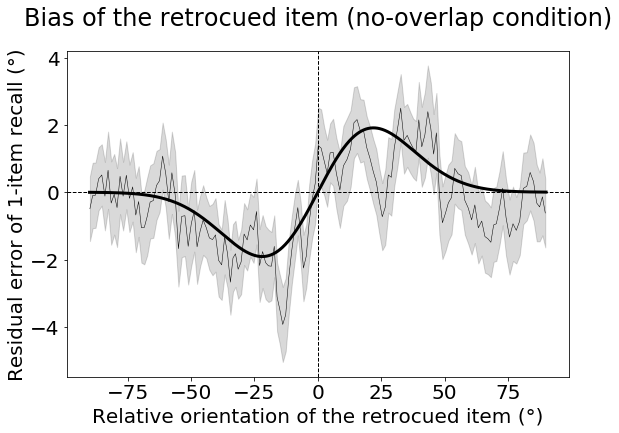

In [11]:
# low conflict influence of PMI
d_stim = np.array(ldftA['d_ltA_pmi'])
error = np.array(ldftA['deerror'])
ind = ~np.isnan(error)
diff_rad = np.deg2rad(d_stim[ind])
error_rad = np.deg2rad(error[ind])

ind = diff_rad.argsort()
diff_rad = diff_rad[ind]
resid_error_rad = error_rad[ind]

bin_step=40
bin_width=200

# Pad the data.
diff_rad = np.concatenate([diff_rad[int(-bin_width / 2):] -  np.pi, diff_rad,
                            diff_rad[:int(bin_width / 2)] +  np.pi])
resid_error_rad = np.concatenate([resid_error_rad[int(-bin_width / 2):],
                                    resid_error_rad,
                                    resid_error_rad[:int(bin_width / 2)]])

# Compute the running average.
bin_starts = np.arange(0, len(diff_rad) - bin_width, bin_step)
bin_stops = bin_starts + bin_width
diff_means = np.empty(len(bin_starts))
error_means = np.empty_like(diff_means)
error_sem = np.empty_like(error_means)
for i in range(len(bin_starts)):
    diff_means[i] = diff_rad[bin_starts[i]:bin_stops[i]].mean()
    error_selection = resid_error_rad[bin_starts[i]:bin_stops[i]]
    error_means[i] = error_selection.mean()
    error_sem[i] = error_selection.std() / np.sqrt(len(error_selection))
    
# Convert to degrees.
diff_means = np.rad2deg(diff_means)
error_means = np.rad2deg(error_means)
error_sem = np.rad2deg(error_sem)

plt.figure(figsize=(9, 6))
plt.rc('font', size=20)   
    
# Plot the data.
plt.plot(diff_means, error_means, 'k', linewidth=0.5)
plt.fill_between(diff_means,
                    error_means - error_sem,
                    error_means + error_sem,
                    alpha=0.15, color='k')

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(0, color='k', linestyle='--', linewidth=1)

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = np.rad2deg(dog(theta, ltA_pmi_a, ltA_pmi_w))
p2p = np.sign(ltA_pmi_a) * (fit.max() - fit.min())
print(p2p)
plt.plot(np.rad2deg(theta), fit, 'k',linewidth=3)
plt.xlabel('Relative orientation of the retrocued item (°)')
plt.ylabel('Residual error of 1-item recall (°)')
plt.title('Bias of the retrocued item (no-overlap condition)', pad=25)

# theta = np.linspace(-np.pi/2, np.pi/2, 1000)
# fit = np.rad2deg(dog(theta, l_pmi_a, l_pmi_w))
# thetaindegree=np.rad2deg(theta)
# fitdf=pd.DataFrame({'distance':thetaindegree,'error':fit})
# fitdf.plot(x='distance',y='error',color='black')

In [12]:
# low conflict influence of PMI
n_permutations=1000
params = np.empty((n_permutations, 3))
for i_perm in range(n_permutations):
        np.random.shuffle(d_ltA_pmi)
        params[i_perm, :] = fit_dog(ltA_deerror_rad, d_ltA_pmi)
        if i_perm%100==0:
            print("finished part %i of 10" %(i_perm/100))
a_permuted = params[:, 0]
w_permuted = params[:, 1]

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = dog(theta, ltA_pmi_a, ltA_pmi_w) # x,a,w
p2p_actual = np.sign(ltA_pmi_a) * (fit.max() - fit.min())

# Compute the permuted peak-to-peaks.
p2p_permuted = np.empty(n_permutations)
for i in range(n_permutations):
    fit = dog(theta, a_permuted[i], w_permuted[i])
    peak_to_peak = np.sign(a_permuted[i]) * (fit.max() - fit.min())
    p2p_permuted[i] = peak_to_peak

c_p = np.count_nonzero(np.abs(p2p_permuted) >abs(p2p_actual)) / float(n_permutations)
print('sign:',np.sign(ltA_pmi_a),'p-value:', c_p, 'p2p:', np.rad2deg(p2p_actual))
# should be significant

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
sign: 1.0 p-value: 0.008 p2p: 3.821993192943077


In [49]:
# low conflict influence of PMI
n_boot=1000
params = np.empty((n_boot, 3))
theta = np.linspace(-np.pi/2, np.pi/2, 1000)
p2p_boot=[]
for i_boot in range(n_boot):
    dps=ltA_deerror_rad.size ###
    iboot_ind=np.random.choice(range(dps),size=dps,replace=True)
    iboot_deerror=ltA_deerror_rad[iboot_ind] ###
    iboot_d=d_ltA_pmi[iboot_ind] ###
    params[i_boot, :] = fit_dog(iboot_deerror, iboot_d)
    iboot_a=params[i_boot, 0]
    iboot_w=params[i_boot, 1]
    fit = np.rad2deg(dog(theta, iboot_a, iboot_w)) # x,a,w
    p2p_iboot = np.sign(iboot_a) * (fit.max() - fit.min())
    p2p_boot.append(p2p_iboot)
    if i_boot%100==0:
        print("finished part %i of 10" %(i_boot/100))
        
    
a_booted = params[:, 0]
w_booted = params[:, 1]
p2p_boot=np.sort(p2p_boot)
print('95% CI: [',p2p_boot[int(0.025*n_boot)+1],', ',p2p_boot[int(0.975*n_boot)], ']')
ltA_pmi_params=params####

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
95% CI: [ 2.5354473959441353 ,  5.662302989775702 ]


2.913247889404377


Text(0.5, 1.0, 'Bias of the retrocued item (overlap condition)')

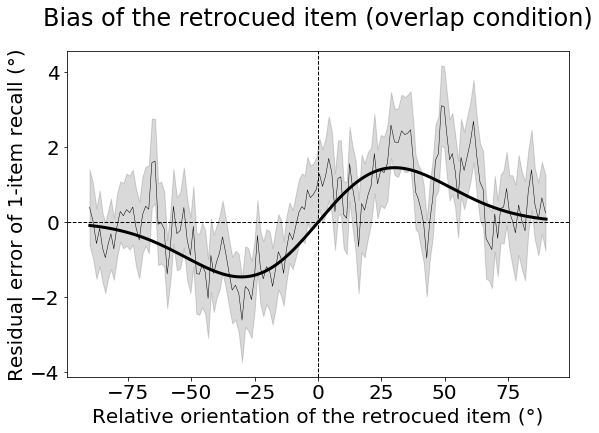

In [12]:
# high conflict influence of PMI
d_stim = np.array(hdftA['d_htA_pmi'])
error = np.array(hdftA['deerror'])
ind = ~np.isnan(error)
diff_rad = np.deg2rad(d_stim[ind])
error_rad = np.deg2rad(error[ind])

ind = diff_rad.argsort()
diff_rad = diff_rad[ind]
resid_error_rad = error_rad[ind]

bin_step=40
bin_width=200

# Pad the data.
diff_rad = np.concatenate([diff_rad[int(-bin_width / 2):] -  np.pi, diff_rad,
                            diff_rad[:int(bin_width / 2)] +  np.pi])
resid_error_rad = np.concatenate([resid_error_rad[int(-bin_width / 2):],
                                    resid_error_rad,
                                    resid_error_rad[:int(bin_width / 2)]])

# Compute the running average.
bin_starts = np.arange(0, len(diff_rad) - bin_width, bin_step)
bin_stops = bin_starts + bin_width
diff_means = np.empty(len(bin_starts))
error_means = np.empty_like(diff_means)
error_sem = np.empty_like(error_means)
for i in range(len(bin_starts)):
    diff_means[i] = diff_rad[bin_starts[i]:bin_stops[i]].mean()
    error_selection = resid_error_rad[bin_starts[i]:bin_stops[i]]
    error_means[i] = error_selection.mean()
    error_sem[i] = error_selection.std() / np.sqrt(len(error_selection))
    
# Convert to degrees.
diff_means = np.rad2deg(diff_means)
error_means = np.rad2deg(error_means)
error_sem = np.rad2deg(error_sem)

plt.figure(figsize=(9, 6))
plt.rc('font', size=20)   
    
# Plot the data.
plt.plot(diff_means, error_means, 'k', linewidth=0.5)
plt.fill_between(diff_means,
                    error_means - error_sem,
                    error_means + error_sem,
                    alpha=0.15, color='k')

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(0, color='k', linestyle='--', linewidth=1)

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = np.rad2deg(dog(theta, htA_pmi_a, htA_pmi_w))
p2p = np.sign(htA_pmi_a) * (fit.max() - fit.min())
print(p2p)
plt.plot(np.rad2deg(theta), fit, 'k',linewidth=3)
plt.xlabel('Relative orientation of the retrocued item (°)')
plt.ylabel('Residual error of 1-item recall (°)')
plt.title('Bias of the retrocued item (overlap condition)', pad=25)

# theta = np.linspace(-np.pi/2, np.pi/2, 1000)
# fit = np.rad2deg(dog(theta, h_pmi_a, h_pmi_w))
# thetaindegree=np.rad2deg(theta)
# fitdf=pd.DataFrame({'distance':thetaindegree,'error':fit})
# fitdf.plot(x='distance',y='error',color='black')

In [14]:
# high conflict influence of PMI
n_permutations=1000
params = np.empty((n_permutations, 3))
for i_perm in range(n_permutations):
        np.random.shuffle(d_htA_pmi)
        params[i_perm, :] = fit_dog(htA_deerror_rad, d_htA_pmi)
        if i_perm%100==0:
            print("finished part %i of 10" %(i_perm/100))
a_permuted = params[:, 0]
w_permuted = params[:, 1]

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = dog(theta, htA_pmi_a, htA_pmi_w) # x,a,w
p2p_actual = np.sign(htA_pmi_a) * (fit.max() - fit.min())

# Compute the permuted peak-to-peaks.
p2p_permuted = np.empty(n_permutations)
for i in range(n_permutations):
    fit = dog(theta, a_permuted[i], w_permuted[i])
    peak_to_peak = np.sign(a_permuted[i]) * (fit.max() - fit.min())
    p2p_permuted[i] = peak_to_peak

c_p = np.count_nonzero(np.abs(p2p_permuted) >abs(p2p_actual)) / float(n_permutations)
print('sign:',np.sign(h_pmi_a),'p-value:', c_p, 'p2p:', np.rad2deg(p2p_actual))
# should be significant

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
sign: 1.0 p-value: 0.025 p2p: 2.9132462838220703


In [51]:
# high conflict influence of PMI
n_boot=1000
params = np.empty((n_boot, 3))
theta = np.linspace(-np.pi/2, np.pi/2, 1000)
p2p_boot=[]
for i_boot in range(n_boot):
    dps=htA_deerror_rad.size ###
    iboot_ind=np.random.choice(range(dps),size=dps,replace=True)
    iboot_deerror=htA_deerror_rad[iboot_ind] ###
    iboot_d=d_htA_pmi[iboot_ind] ###
    params[i_boot, :] = fit_dog(iboot_deerror, iboot_d)
    iboot_a=params[i_boot, 0]
    iboot_w=params[i_boot, 1]
    fit = np.rad2deg(dog(theta, iboot_a, iboot_w)) # x,a,w
    p2p_iboot = np.sign(iboot_a) * (fit.max() - fit.min())
    p2p_boot.append(p2p_iboot)
    if i_boot%100==0:
        print("finished part %i of 10" %(i_boot/100))
        
    
a_booted = params[:, 0]
w_booted = params[:, 1]
p2p_boot=np.sort(p2p_boot)
print('95% CI: [',p2p_boot[int(0.025*n_boot)+1],', ',p2p_boot[int(0.975*n_boot)], ']')
htA_pmi_params=params####

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
95% CI: [ 1.7864918941818653 ,  4.120666092039228 ]


-0.475512153604933


Text(0.5, 1.0, 'Bias of IMI (no-overlap condition)')

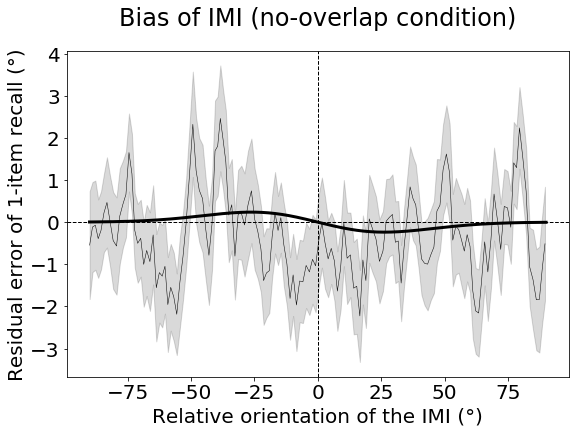

In [13]:
# low conflict influence of IMI
d_stim = np.array(ldftA['d_ltA_imi'])
error = np.array(ldftA['deerror'])
ind = ~np.isnan(error)
diff_rad = np.deg2rad(d_stim[ind])
error_rad = np.deg2rad(error[ind])

ind = diff_rad.argsort()
diff_rad = diff_rad[ind]
resid_error_rad = error_rad[ind]

bin_step=40
bin_width=200

# Pad the data.
diff_rad = np.concatenate([diff_rad[int(-bin_width / 2):] -  np.pi, diff_rad,
                            diff_rad[:int(bin_width / 2)] +  np.pi])
resid_error_rad = np.concatenate([resid_error_rad[int(-bin_width / 2):],
                                    resid_error_rad,
                                    resid_error_rad[:int(bin_width / 2)]])

# Compute the running average.
bin_starts = np.arange(0, len(diff_rad) - bin_width, bin_step)
bin_stops = bin_starts + bin_width
diff_means = np.empty(len(bin_starts))
error_means = np.empty_like(diff_means)
error_sem = np.empty_like(error_means)
for i in range(len(bin_starts)):
    diff_means[i] = diff_rad[bin_starts[i]:bin_stops[i]].mean()
    error_selection = resid_error_rad[bin_starts[i]:bin_stops[i]]
    error_means[i] = error_selection.mean()
    error_sem[i] = error_selection.std() / np.sqrt(len(error_selection))
    
# Convert to degrees.
diff_means = np.rad2deg(diff_means)
error_means = np.rad2deg(error_means)
error_sem = np.rad2deg(error_sem)

plt.figure(figsize=(9, 6))
plt.rc('font', size=20)   

# Plot the data.
plt.plot(diff_means, error_means, 'k', linewidth=.5)
plt.fill_between(diff_means,
                    error_means - error_sem,
                    error_means + error_sem,
                    alpha=0.15, color='k')

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(0, color='k', linestyle='--', linewidth=1)

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = np.rad2deg(dog(theta, ltA_imi_a, ltA_imi_w))
p2p = np.sign(ltA_imi_a) * (fit.max() - fit.min())
print(p2p)
plt.plot(np.rad2deg(theta), fit, 'k',linewidth=3)
plt.xlabel('Relative orientation of the IMI (°)')
plt.ylabel('Residual error of 1-item recall (°)')
plt.title('Bias of IMI (no-overlap condition)', pad=25)
# theta = np.linspace(-np.pi/2, np.pi/2, 1000)
# fit = np.rad2deg(dog(theta, l_imi_a, l_imi_w))
# thetaindegree=np.rad2deg(theta)
# fitdf=pd.DataFrame({'distance':thetaindegree,'error':fit})
# fitdf.plot(x='distance',y='error',color='black')

In [16]:
# low conflict influence of IMI
n_permutations=1000
params = np.empty((n_permutations, 3))
for i_perm in range(n_permutations):
        np.random.shuffle(d_ltA_imi)
        params[i_perm, :] = fit_dog(ltA_deerror_rad, d_ltA_imi)
        if i_perm%100==0:
            print("finished part %i of 10" %(i_perm/100))
a_permuted = params[:, 0]
w_permuted = params[:, 1]

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = dog(theta, ltA_imi_a, ltA_imi_w) # x,a,w
p2p_actual = np.sign(ltA_imi_a) * (fit.max() - fit.min())

# Compute the permuted peak-to-peaks.
p2p_permuted = np.empty(n_permutations)
for i in range(n_permutations):
    fit = dog(theta, a_permuted[i], w_permuted[i])
    peak_to_peak = np.sign(a_permuted[i]) * (fit.max() - fit.min())
    p2p_permuted[i] = peak_to_peak

c_p = np.count_nonzero(np.abs(p2p_permuted) >abs(p2p_actual)) / float(n_permutations)
print('sign:',np.sign(ltA_imi_a),'p-value:', c_p, 'p2p:', np.rad2deg(p2p_actual))
# should be significant

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
sign: -1.0 p-value: 0.887 p2p: -0.47549264683952386


In [53]:
# low conflict influence of IMI
n_boot=1000
params = np.empty((n_boot, 3))
theta = np.linspace(-np.pi/2, np.pi/2, 1000)
p2p_boot=[]
for i_boot in range(n_boot):
    dps=ltA_deerror_rad.size ###
    iboot_ind=np.random.choice(range(dps),size=dps,replace=True)
    iboot_deerror=ltA_deerror_rad[iboot_ind] ###
    iboot_d=d_ltA_imi[iboot_ind] ###
    params[i_boot, :] = fit_dog(iboot_deerror, iboot_d)
    iboot_a=params[i_boot, 0]
    iboot_w=params[i_boot, 1]
    fit = np.rad2deg(dog(theta, iboot_a, iboot_w)) # x,a,w
    p2p_iboot = np.sign(iboot_a) * (fit.max() - fit.min())
    p2p_boot.append(p2p_iboot)
    if i_boot%100==0:
        print("finished part %i of 10" %(i_boot/100))
        
    
a_booted = params[:, 0]
w_booted = params[:, 1]
p2p_boot=np.sort(p2p_boot)
print('95% CI: [',p2p_boot[int(0.025*n_boot)+1],', ',p2p_boot[int(0.975*n_boot)], ']')
ltA_imi_params=params####

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
95% CI: [ -2.0587187815958448 ,  3.4103160567494073 ]


1.7836753577976072


Text(0.5, 1.0, 'Bias of IMI (overlap condition)')

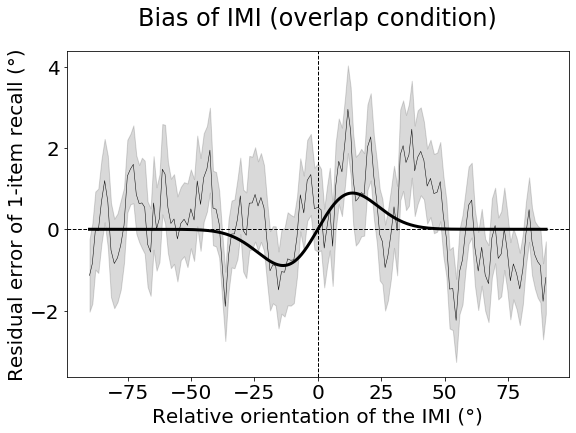

In [14]:
# high conflict influence of IMI
d_stim = np.array(hdftA['d_htA_imi'])
error = np.array(hdftA['deerror'])
ind = ~np.isnan(error)
diff_rad = np.deg2rad(d_stim[ind])
error_rad = np.deg2rad(error[ind])

ind = diff_rad.argsort()
diff_rad = diff_rad[ind]
resid_error_rad = error_rad[ind]

bin_step=40
bin_width=200

# Pad the data.
diff_rad = np.concatenate([diff_rad[int(-bin_width / 2):] -  np.pi, diff_rad,
                            diff_rad[:int(bin_width / 2)] +  np.pi])
resid_error_rad = np.concatenate([resid_error_rad[int(-bin_width / 2):],
                                    resid_error_rad,
                                    resid_error_rad[:int(bin_width / 2)]])

# Compute the running average.
bin_starts = np.arange(0, len(diff_rad) - bin_width, bin_step)
bin_stops = bin_starts + bin_width
diff_means = np.empty(len(bin_starts))
error_means = np.empty_like(diff_means)
error_sem = np.empty_like(error_means)
for i in range(len(bin_starts)):
    diff_means[i] = diff_rad[bin_starts[i]:bin_stops[i]].mean()
    error_selection = resid_error_rad[bin_starts[i]:bin_stops[i]]
    error_means[i] = error_selection.mean()
    error_sem[i] = error_selection.std() / np.sqrt(len(error_selection))
    
# Convert to degrees.
diff_means = np.rad2deg(diff_means)
error_means = np.rad2deg(error_means)
error_sem = np.rad2deg(error_sem)

plt.figure(figsize=(9, 6))
plt.rc('font', size=20)   

# Plot the data.
plt.plot(diff_means, error_means, 'k', linewidth=0.5)
plt.fill_between(diff_means,
                    error_means - error_sem,
                    error_means + error_sem,
                    alpha=0.15, color='k')

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(0, color='k', linestyle='--', linewidth=1)

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = np.rad2deg(dog(theta, htA_imi_a, htA_imi_w))
p2p = np.sign(htA_imi_a) * (fit.max() - fit.min())
print(p2p)
plt.plot(np.rad2deg(theta), fit, 'k',linewidth=3)
plt.xlabel('Relative orientation of the IMI (°)')
plt.ylabel('Residual error of 1-item recall (°)')
plt.title('Bias of IMI (overlap condition)', pad=25)

# theta = np.linspace(-np.pi/2, np.pi/2, 1000)
# fit = np.rad2deg(dog(theta, h_imi_a, h_imi_w))
# thetaindegree=np.rad2deg(theta)
# fitdf=pd.DataFrame({'distance':thetaindegree,'error':fit})
# fitdf.plot(x='distance',y='error',color='black')

In [18]:
# high conflict influence of IMI
n_permutations=1000
params = np.empty((n_permutations, 3))
for i_perm in range(n_permutations):
        np.random.shuffle(d_htA_imi)
        params[i_perm, :] = fit_dog(htA_deerror_rad, d_htA_imi)
        if i_perm%100==0:
            print("finished part %i of 10" %(i_perm/100))
a_permuted = params[:, 0]
w_permuted = params[:, 1]

theta = np.linspace(-np.pi/2, np.pi/2, 1000)
fit = dog(theta, htA_imi_a, htA_imi_w) # x,a,w
p2p_actual = np.sign(htA_imi_a) * (fit.max() - fit.min())

# Compute the permuted peak-to-peaks.
p2p_permuted = np.empty(n_permutations)
for i in range(n_permutations):
    fit = dog(theta, a_permuted[i], w_permuted[i])
    peak_to_peak = np.sign(a_permuted[i]) * (fit.max() - fit.min())
    p2p_permuted[i] = peak_to_peak

c_p = np.count_nonzero(np.abs(p2p_permuted) >abs(p2p_actual)) / float(n_permutations)
print('sign:',np.sign(htA_imi_a),'p-value:', c_p, 'p2p:', np.rad2deg(p2p_actual))
# should NOT be significant

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
sign: 1.0 p-value: 0.226 p2p: 1.7834989554037899


In [55]:
# high conflict influence of IMI
n_boot=1000
params = np.empty((n_boot, 3))
theta = np.linspace(-np.pi/2, np.pi/2, 1000)
p2p_boot=[]
for i_boot in range(n_boot):
    dps=htA_deerror_rad.size ###
    iboot_ind=np.random.choice(range(dps),size=dps,replace=True)
    iboot_deerror=htA_deerror_rad[iboot_ind] ###
    iboot_d=d_htA_imi[iboot_ind] ###
    params[i_boot, :] = fit_dog(iboot_deerror, iboot_d)
    iboot_a=params[i_boot, 0]
    iboot_w=params[i_boot, 1]
    fit = np.rad2deg(dog(theta, iboot_a, iboot_w)) # x,a,w
    p2p_iboot = np.sign(iboot_a) * (fit.max() - fit.min())
    p2p_boot.append(p2p_iboot)
    if i_boot%100==0:
        print("finished part %i of 10" %(i_boot/100))
        
    
a_booted = params[:, 0]
w_booted = params[:, 1]
p2p_boot=np.sort(p2p_boot)
print('95% CI: [',p2p_boot[int(0.025*n_boot)+1],', ',p2p_boot[int(0.975*n_boot)], ']')
htA_imi_params=params####

finished part 0 of 10
finished part 1 of 10
finished part 2 of 10
finished part 3 of 10
finished part 4 of 10
finished part 5 of 10
finished part 6 of 10
finished part 7 of 10
finished part 8 of 10
finished part 9 of 10
95% CI: [ -2.4608329066616976 ,  4.008999242491285 ]
